In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [484]:
# função para traçar reta no gráfico
def coord(w0,w1,w2,x1):
  if w2 != 0:
    return (-w0-w1*x1)/w2
  else:
    return 2000

In [485]:
column_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=column_names)

# setosa e versicolor
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Sepala e Petala
X = df.iloc[:100, [0,2]].values
X_virginica = df.iloc[100:150, [0,2]].values

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=100)
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((10, 2), (90, 2), (10,), (90,))

In [486]:
class Perceptron(object):

    def __init__(self, learning_rate=0.1, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(1 + X.shape[1])
        print(f'Initial weights = {self.weights}')

    def fit(self, X, y):
        self.errors = []

        for _ in range(self.epochs):
            error = 0

            for data, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(data))

                self.weights[0] +=  update * 1
                self.weights[1:] +=  update * data

                error += int(update != 0.0)

            self.errors.append(error)

        print(f'Weights after training = {self.weights}')

    def dot_product(self, X):
        npdot = np.dot(X, self.weights[1:])

        return self.weights[0] + npdot

    def predict(self, X):
        return np.where(self.dot_product(X) >= 0, 1, -1)

In [487]:
perceptron = Perceptron(epochs=10, learning_rate=0.01)

Initial weights = [0.90966244 0.6727661  0.0117712 ]


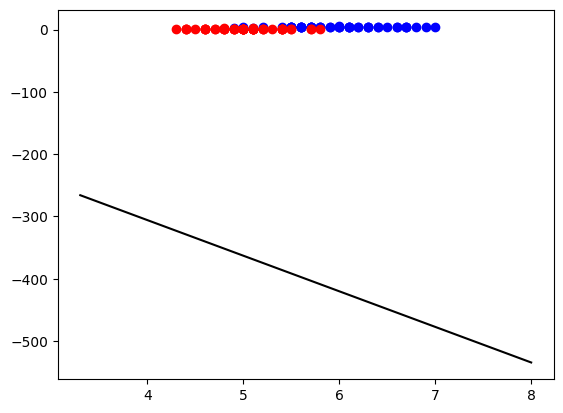

In [488]:
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(perceptron.weights[0],perceptron.weights[1],perceptron.weights[2], x),color='black')
plt.show()

In [489]:
#Realiza o treinamento
perceptron.fit(X_train, y_train)

Weights after training = [ 0.66966244 -0.2892339   0.3257712 ]


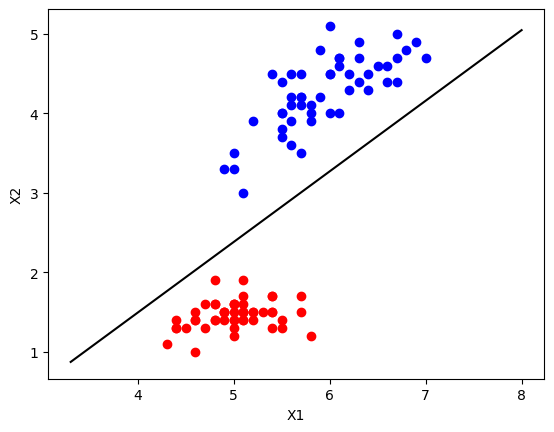

In [490]:
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(perceptron.weights[0],perceptron.weights[1],perceptron.weights[2], x),color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [491]:
y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Precisão do Perceptron: {:.2f}%".format(accuracy * 100))

virginica_pred = perceptron.predict(X_virginica)

virginica_pred

Precisão do Perceptron: 100.00%


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'Errors')

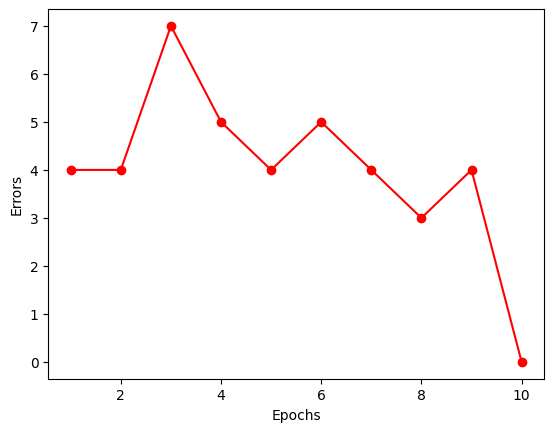

In [492]:
plt.plot(range(1, len(perceptron.errors)+1), perceptron.errors, marker='o', color='red')
plt.xlabel('Epochs')
plt.ylabel('Errors')